<a href="https://colab.research.google.com/github/Jeonghyeock/AI-X-DeepLearning/blob/master/IMDB_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMDB 리뷰 데이터에 대한 이해

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

영화 리뷰 데이터는 케라스에서 제공하는 IMDB 리뷰 데이터를 사용했다.
<br />
데이터는 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공한다.

[Keras - IMDB 리뷰 데이터](https://keras.io/api/datasets/imdb/)


In [114]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

imdb.data_load() 함수로 훈련 데이터와 테스트 데이터를 가져온다

In [115]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력한다.

In [116]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


0번째 index의 훈련용 리뷰를 출력해 본다.

X_train은 단어들의 등장 빈도에 따라 인덱스의 집합으로 나타나고, y_train은 감성 정보로서 부정이면 0, 긍정이면 1의 값을 가진다.

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


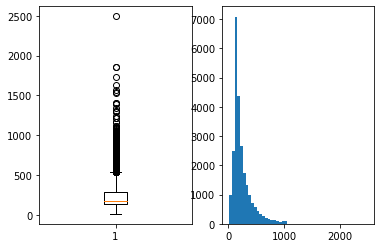

In [117]:
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [118]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("감성 정보의 개수:")
print(np.asarray((unique_elements, counts_elements)))

감성 정보의 개수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰 중 긍정과 부정 리뷰의 개수는 각각 12,500개이다.

In [119]:
word_index = imdb.get_word_index()
index_word={}
for key, value in word_index.items():
    index_word[value+3] = key

imdb.get_word_index()에는 각 단어와 맵핑되는 정수가 저장되어져 있다.

주의할 점은 IMDB 리뷰 데이터셋에서 정한 규칙에 따라 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수가 나온다는 점이다.

index_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있다. IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있어서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어이다.

In [120]:
print('빈도수 상위 1등 단어 : {}'.format(index_word[4]))

빈도수 상위 1등 단어 : the


In [121]:
print('빈도수 상위 3938등 단어 : {}'.format(index_word[2195]))

빈도수 상위 3938등 단어 : halloween


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 3938번째로 높은 단어는 suited이다.

# 2. GRU로 IMDB 리뷰 감성 분석하기

In [122]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

패키지 import

In [123]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

단어 집합의 크기 10000으로 제한

In [124]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

리뷰 최대 길이 500으로 제한

In [125]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(10000, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

Embedding()은 두 개의 인자를 받는데, 첫번째 인자는 단어 집합의 크기이며 두번째 인자는 임베딩 후의 벡터 크기이다.

In [126]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

EarlyStopping 조건으로 patience 4를 지정한다.

또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장하도록 한다.

In [127]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4894 - acc: 0.7702
Epoch 00001: val_acc improved from -inf to 0.83980, saving model to GRU_model.h5
313/313 [==============================] - 43s 131ms/step - loss: 0.4894 - acc: 0.7702 - val_loss: 0.3778 - val_acc: 0.8398
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3056 - acc: 0.8778
Epoch 00002: val_acc improved from 0.83980 to 0.85760, saving model to GRU_model.h5
313/313 [==============================] - 41s 130ms/step - loss: 0.3056 - acc: 0.8778 - val_loss: 0.3422 - val_acc: 0.8576
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2421 - acc: 0.9092
Epoch 00003: val_acc did not improve from 0.85760
313/313 [==============================] - 41s 130ms/step - loss: 0.2421 - acc: 0.9092 - val_loss: 0.4514 - val_acc: 0.8390
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2013 - acc: 0.9250
Epoch 00004: val_acc improved from 0.85760 to 0.8

이진 분류이므로 출력층은 뉴런 하나와 활성화 함수로 시그모이드 함수를 사용한다.

긍정인지 부정인지에 대한 이진 판별값이 출력이 되기 때문에, 손실 함수는 binary_crossentropy, 최적화 함수는 rmsprop를 사용한다. 또한, 에포크마다 정확도를 구하기위해 accuracy를 추가한다. 에포크는 총 15회를 수행한다.

실행 결과, 조기 종료 조건에 따라서 에포크 10회에서 조기 종료되었다.

In [128]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 30s 37ms/step - loss: 0.2877 - acc: 0.8884

 테스트 정확도: 0.8884


ModelCheckpoint에 따라서 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드한다.

테스트 데이터에 대해서 정확도 89.29%를 얻었다. 임의의 문장에 대해서 리뷰의 긍, 부정을 예측하기 위해서는 모델에 넣기 전에 임의의 문장에 대해서 전처리를 해주어야 한다.

In [129]:
def sentiment_analysis(sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  sentence = re.sub('[^0-9a-zA-Z ]', '', sentence).lower()

  # 정수 인코딩
  encoded = []
  for word in sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_index[word] <= 10000:
        encoded.append(word_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=500) # 패딩
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정적임.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정적임.".format((1 - score) * 100))

sentiment_analysis는 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수이다.

인터스텔라 리뷰 감성분석

In [130]:
# 별점 1점
review = "A simple farm guy named Copper (Matthew McConaughey) and a few other experts go into outer space to explore other worlds that might sustain human life. It seems that that life on Earth might not survive due to to some unexplained environmental disaster. Naturally nothing goes right. WAY overpraised and terrible sci-fi movie. When I heard the plot from this I expected the worst. Writer/director Christopher Nolan has never been a favorite for me--I HATE what he did to Batman in his movie trilogy. I thought that he as trying to imitate Stanley Kubrick ('2001') here but it's far worse--he's doing Steven Spielberg! The movie runs WAY too long (165 minutes) and they're constantly pushing family friendly values in your face. Cooper's non-stop yammering about his daughter got on my nerves instantly. Also that stupid fake southern accent he adopts is immediately annoying. The story is very slow and all the characters are cardboard cutouts you've seen in other movies. The special effects are flawless and there's some beautiful cinematography here but the extreme length and boring story really weigh it down. Any sort of statement they're trying to make on time and life is completely deadened by the script. Also this movie is very manipulative and way too sentimental. They go out of their way to make the audience cry--like at a Spielberg movie. Well I did cry--tears of joy at the end that this was over! Also the gaps in logic and plot holes here are very annoying. I lost track of how many times I rolled my eyes at the dubious 'logic' served up here. The acting was as good as it could be (I guess) but, at the end, they throw in a surprise guest star (who I won't name). It didn't help because I think he's a terrible actor and this didn't change my mind. I was bored and looked at my watch MANY times while this played. It's boring, obvious and manipulative. Why is this getting so much praise? Skip it."

sentiment_analysis(review)

99.82% 확률로 부정적임.


In [131]:
# 별점 10점
review = "A lot has been said and written about Interstellar. You can obviously take apart any movie that is out there. You'll either love this one or you won't. I kind of would have loved to have watched this on an IMAX screen, the sheer scope of the whole thing. It's just amazing, what Nolan has put on screen here. It's not only the visual experience (there is no 3D here by the way), it's the story/ride you take with it. It might be clear to some earlier than to others, where it's heading (no pun intended), but it doesn't change the fact that it's beautiful ... and terrifying at the same time. Going out and saying this will be considered a classic, might not be too far stretched, but you still can never predict those things. The deserved love the movie gets on IMDb and other places would be an indicator that this will ring true though. The acting is really good, but I can understand if some people have issues with the ending. But the movie had to end in one way or another. It's the best possible way this could go, even if it's not in our grasps just yet"

sentiment_analysis(review)

84.40% 확률로 긍정적임.


In [132]:
# 별점 4점
review = "Another outer space film from Hollywood, this time directed by INCEPTION's Christopher Nolan. Thankfully it's better than the overrated GRAVITY, but INTERSTELLAR soon turns out to be overrated in turn. It seems that as soon as a film comes out these days with a half intelligent premise, critics and audiences lap it up and rate it as one of the best ever. INTERSTELLAR is far from that. It has plenty of interesting moments, but the overlong running time is padded and bloated with endless sentimentalism and extraneous characters. It also takes a heck of a lot of time for anything to actually happen. Matthew McConaughey is all earnestness as the protagonist and comes across as a dullard; Anne Hathaway's character is completely extraneous and lacking in charisma. Only old timers like John Lithgow and Michael Caine shine, although Wes Bentley is underutilised in his role. An unexpected appearance from Matt Damon is undoubtedly the story's highlight. For much of the running time this follows the template of a typical space adventure, but around the middle part of the film it starts to get weighed down with endless CGI effects and the whole end part of the production gets muddled and predictable in equal measure, coming across like a rip off of 2001: A SPACE ODYSSEY but not nearly as good."

sentiment_analysis(review)

82.93% 확률로 부정적임.


In [133]:
# 별점 5점
review = "OK, time for me to turn in my Christopher Nolan card. Ever since 'Memento,' I've been waiting for Christopher Nolan to make another film that isn't a big hot mess, and it seems I will be waiting forever. He comes up with terrific conceits that clearly make sense to him, but he simply cannot translate them to the screen and make them intelligible to anyone else. 'Interstellar' is his latest load of hooey, nearly three hours of sci-fi mumbo jumbo queasily married to a sentimental father/daughter drama. It goes on forever and includes all manner of tangents that a more concise writer or editor (anybody, please!) would have excised. Indeed, Nolan's biggest failing as a writer/director is that he can't seem to get his thoughts organized, and every movie he makes feels like a rough draft that no one ever got around to assembling into a coherent narrative. To give him credit, 'Interstellar' isn't anywhere nearly as incoherent as 'The Prestige' or 'Inception,' and it's not as leadenly humorless and self-important as 'The Dark Knight,' but it's just as exasperating as all of those other movies in its tendency to start with a good concept that it then buries under a heap of directorial self indulgence. I learned a long time ago to simply stop going to see Oliver Stone or Spike Lee movies when I realized that neither was ever going to make a good movie, and I guess I now have to add Nolan to that dubious list."

sentiment_analysis(review)

98.80% 확률로 부정적임.


In [134]:
# 별점 6점
review = "In a post-apocalyptic future, crop blight is destroying civilization. The former pilot and engineer Cooper (Matthew McConaughey) lives in a farm in the countryside with his teenage son Tom, his daughter Murph and father-in-law Donald (John Lithgow). Murph is convinced that there is a ghost in her room trying to communicate with her and Cooper decodes a message with a coordinate. He heads to the location and finds a hidden NASA facility. Cooper meets Professor Brand (Michael Caine) that explains that they have found a wormhole and sent several spacecraft to seek a planet to send mankind. Only three of them are returning signals and now they want to launch the spacecraft Endurance to recover the collected data. He invites Cooper to be the pilot of Endurance and travel with his daughter Amelia (Anne Hathaway); the scientists Doyle (Wes Bentley) and Romilly (David Gyasi); and the robots TARS and CASE. Cooper accepts and Murph is overwhelmed with his decision. Copper crosses the wormhole to a distant galaxy in the beginning of a dangerous trip to save mankind. 'Interstellar' is a sci-fi with a pretentious and overrated trip by the Hollywood darling Christopher Nolan. The story has a promising beginning, but becomes totally nonsense in the moment that Cooper leaves Brand. The plot is pretentious and uses Einstein relativity theory and other scientific concepts that are impossible to know whether they have scientific accuracy or not. My vote is six."

sentiment_analysis(review)

74.44% 확률로 부정적임.


인터스텔라의 IMDB 리뷰 중 별점 1점과 10점의 리뷰를 분석하고, 추가로 중간 별점 리뷰들을 분석했다. 그중 별점 5점의 리뷰 분석 결과가 예상과 달라 추가로 분석했다.

In [135]:
# 별점 4점
review = "This film is not recommended. Interstellar must be renamed to 2015: A Space Oddity. Once there is lift-off, there is much gravitas and solemn beauty in its weightless universe, even if the film bogs down whenever it tethers itself to Earth, its inhabitants, and their on-going battle with global change. (Yes, you naysayers, it was real!) ￼ The film owes its whole existence to the granddaddy of all space exploration films, 2001: A Space Odyssey. Interstellar is similar in its alignment to scientific probabilities, quantum physics, and algorithms with much talk about wormholes, black holes, time travel, and anomalies. The further connection to Kubrick's masterpiece is even more evident with the episodic nature in Interstellar's plot structure, its minimal in character development (except for its lead character), and its overtly pretentious and sanctimonious tone. More odd in its dramatic flourishes than needed, Nolan's film reaches for the heavens but never soars to any level of greatness. The film is earnest, well-crafted, and stylishly directed, but hardly emotionally involving. Blame the overstuffed script (by Nolan and his brother, Jonathan) for the lack of any real tension or satisfaction. Sections of the film just never gel, leading to an ending that is visually stunning and total nonsense. ￼ The film also owes some of its technical prowess to last year's Gravity in its overall visual look. (That film did it all so much better.) Still the visuals are Interstellar's chief asset (with a dazzling set piece set in the fourth dimension that is especially dazzling in the IMAX format). This film is a long-drawn-out sci-fi fantasy, a seriously-minded adventure film that is takes itself too seriously with scientific exposition and high-brow poetic pause that make the film too solemn and corny to truly enjoy. ￼ Now, let's discuss the story and characters a bit. It is the future and Earth is a dustbin with its population dwindling. Our only hope is what lies above. A team of astronauts is assembled to find another world from three other planets in another galaxy on which we can co-habitat. Leading this crew is a man who must have the right stuff, aptly named Cooper played by Matthew McConaughey. Coop is a widow raising two small children and obsessing with enough pangs of patriarchal guilt and crying jags to possibly earn another Oscar. Sent by old school scientist Dr. Brand (Michael Caine), who is receiving a weak signal from outer space, he bids adieu to his young wards to go space-ward, leaving the coop and his smart daughter Murph (MacKenzie Foy) and older son Tom (Timothée Chalamet) behind in order to help mankind and save his family from an ultimate death. Time passes quickly for these earthlings (and all too slowly for the audience) as 23 years pass and Murph and Tom have grown up, becoming Jessica Chastain and Casey Affleck while Coop stays forever young. Of course, there will be snags in this mission. Pardon the pun: it's Murphy's Law. Also on board are other space travelers: Dr. Brand's daughter, Amelia (Anne Hathaway) who acts more Bedelia than Earhart, a nondescript Doyle (Wes Bentley), and Romilly (David Gyasi) as the token African-American astronaut and one of the few minorities on screen. Off they go on their spacecraft named Endurance, an apt title indeed! ￼ The acting is barely adequate and well, under stellar. The characters barely register as real people as they continually wax philosophically about life, physics, love, mathematics, and the pursuit of happiness. Their dialogues never resemble anything remotely convincing. Again, the screenplay's poor plotting and weak characterizations aborts their mission. With Interstellar, the sum of its parts are greater than the whole (or hole). In fact, there seem to be an overabundance of holes in Interstellar: black holes, wormholes, and plot holes, the latter being the most dangerous and unavoidable one due to the Brothers Nolans' sappy screenplay. The episodic structure of the film is unable to connect its story lines to make any logical sense. Nolan's film is a major disappointment. In retrospect, perhaps an even better name for Interstellar might be Close Encounters of the Third Rate Kind. At times, the film is a visual pleasure, fitfully entertaining and thought-provoking in its overall production design. But more often, Interstellar is just dull, uninspiring, and a long, long journey into that good night."

sentiment_analysis(review)

95.58% 확률로 부정적임.


In [136]:
# 별점 5점
review = "In the future, human kind is in danger of running out of food and oxygen. Therefor Cooper agrees to embark on a space journey and travel through a wormhole in order to find a new word for humanity. The thing is, I expected more from the movie. Cristopher Nolan is my favorite director and I know that he could make amazing things, but Interstaller wasn't good enough. It reminded me a little of Gravity and it was too science fiction, with many humanity dilemmas that weren't philosophized enough, with the subject of time being all too confusing and with the main idea being the bond between father and daughter rather than the future of the humanity. However that last one was a refreshing new one, as the movie didn't focus on saving the earth as many other before it have. Though, from some point, you do want it to be more than that, as it seems to have stuck on the family matter. The whole idea of the They is confusing, not to mention the ending, but this is Nolan, the guy who made Insception, so you can't expect to understand it from the first time. Maybe I have to watch it more times in order to appreciate it more. But for now a 5 for the Interstaller."

sentiment_analysis(review)

96.82% 확률로 긍정적임.


In [137]:
# 별점 6점
review = "I'm probably not the target audience for the freres Nolan as I tend to notice things instead of being seduced. Take the opening. We're in East Jesus in the heart of the dust bowl. An ordinary family, a wooden home one step up from a tarpaper shack. Inside an equally ordinary kitchen THEN, in the bedroom of the daughter of the house, Murph, we find FLOOR-TO-CEILING BOOKSHELVES? Fully stocked. You're putting me on, right, Chris. More? Seems the father of Murph is an ex pilot who has retired to become a farmer. No real problem there BUT, he and Murph stumble on some co-ordinates and follow them to a top-secret NASA base where the head honcho is Professor Michael Caine. They show the intruder the latest space-ship, explain that earth is running out of food and the only solution is to find a planet that will sustain human life AND THEN invite him to lead the mission. This is a guy who hasn't flown in x amount of years and may or may not be in shape. There is no training programme, no vetting, the whole thing resembles a car salesman offering someone who walks in off the street a chance to test drive the latest top-of-the-range Lamborghini. If you can get past this nonsense you may well enjoy what follows. Unlike, say, Gravity, which was virtually one hundred per cent in space, Intersteller does introduce a human element and is all the better for it. Clearly the Nolans are interested in exploiting technology at the expense of constructing an even halfway plausible screenplay and there are probably enough overgrown schoolboys out there who will respond to cgi the way Pavlov's dog responded to a bell."

sentiment_analysis(review)

58.14% 확률로 긍정적임.


영화 장르가 리뷰 분석 값에 영향을 주는 것을 알아보기 위해 장르가 다른 영화도 분석했다.

레옹 리뷰 감성분석

In [138]:
# 별점 1점
review = "I tried watching this movie after reading all the positive reviews. But it seems the positive reviews come from people who don't have a critical eye for cinema, don't care if a movie is realistic or not, don't care if it is overdramatized or makes any sense, or anything like that. The problem is that this is not a sci fi movie. These are things that are necessary for a crime movie, especially of this nature. This is not the matrix or some sort of martial arts film. It is a organized crime/hitman movie. And in these movies you expect things to be realistic and believable, not overdramatized and downright silly. And thats what this movie is. It is ridiculously unrealistic and just ludicrous. Nothing in it is believable or makes sense. And I am not talking about in an artistic cinematic way either. I'm talking about the way in which you'd expect a movie to look if it was made by a teenager. This movie seems like it was made my someone who doesn't know anything about organized crime, or the real world, or film making. I'm not sure why people would be giving it good ratings, unless they were the same in that. I sat there incredulously for as long as I could before turning it off, but I didn't even make it through the first act, it was that bad."

sentiment_analysis(review)

99.56% 확률로 부정적임.


In [139]:
# 별점 5점
review = "Just when you thought the large majority of reviewers on IMDb were reasonable and constructive in their analysis, along comes a film which destroys completely that impression! This movie is relentlessly and thoroughly implausible from its opening scene to the improbable closing where the sole remaining possession of Leon, a potted plant which has miraculously survived, amongst other things, walls of fire, smoke bombs and bazooka attacks, is planted in what appears to be an open lawn! Unbelievable that seemingly 80% or more of near 900 reviewers here have very strangely anointed this movie a near masterpiece. My score of 5 is over-generous considering the litany of implausible character and plot situations. The most incredulous situation is the fact that Mathilda is a 12 year old, sometimes acting her age but more often than not engaging in conversation which is not only that of a mature woman but also appears quite disturbing in light of the sexual tension depicted. And for goodness sake, what 12 year old blithely refers to long dead couples such as Bonnie and Clyde?! The age factor of Mathilda and the implausibility of her words and actions in every scene remain front and center at the startlingly obvious weakness of this movie, regardless of how brilliant Natalie Portman's performance may appear.How incredible that she seems to have taught the near illiterate Leon to read in what seems just over a week. Considering that Leon has been in the US since age 19 and has developed skills as an ace hit-man and YET still can't read English defies credibility. As for Gary Oldman's portrayal of Stansfield, how could the actions of a vicious, destructive pill-popping police officer of seniority go unnoticed? How did he reach such a position in the first place? Totally unbelievable. And how can the near destruction of a hotel in Leon's pursuit of the gangster in the opening scenes, with innumerable rounds of machine gun fire, go unnoticed by anybody else in the building. Unbelievable. No police response until the climax where seemingly hundreds of highly-armed police and commandos with flame throwers and bazookas and smoke bombs and.......absolutely UNBELIEVABLE! So over-rated, so implausible. This bilge borders on parody. Ridiculous movie-making."

sentiment_analysis(review)

92.18% 확률로 부정적임.


In [140]:
# 별점 5점
review = "I found myself rolling eyes to many time in this movie for it to be rated so high. How did the story of Leon saying 'no women no children' get back to the D.E.A., after Leon killed everyone their? And then Leon just marches into the D.E.A. offices in New York kills 2 guys and leaves, no problem? Then, how did the D.E.A. guy even find Leon and the Girl in the final scene? Also how did the D.E.A. guy even recognize Leon? I could go on with annoyances. Who can watch this movie and miss how poor the story ties together. Yes, it was mildly entertaining. But the script seemed to be written overnight. This is no 'great' by any means."

sentiment_analysis(review)

50.36% 확률로 긍정적임.


In [141]:
# 별점 10점
review = "Luc Besson's film Leon:The Professional is a superb one. Visually, it is very stylish, with striking location work, atmospheric lighting and really authentic and bold cinematography. The soundtrack also does very well in enhancing the mood of each scene, and Besson's direction is faultless. There is also a gripping story with well crafted characters particularly Mathilda and Jean Reno's character Leon, a cracking script and crisp pacing and while there are some over-the-top and intense moments particularly with Stansfield and the beginning, particularly as the chemistry between Mathilda and Leon expands there are some poignant ones too. The acting is excellent. Jean Reno is charismatic and commanding in the title role while Gary Oldman is wildly bombastic as Stansfield. But I was especially impressed by Natalie Portman, who delivers one of the best and most captivating feature debuts ever. In conclusion, a fantastic film. 10/10 Bethany Cox"

sentiment_analysis(review)

99.42% 확률로 긍정적임.


포레스트 검프 리뷰 감성분석

In [142]:
# 별점 1점
review = "This movie as an awful story line. I think It got an 8.8 because Tom Hanks is in it. Real it is an awful movie. 1 give it out 10 because it is crap. This movie so awful. Do not see it. It is a big pile of pooh pooh. Just do not see it. It is noting but hype. That is all it is. I do not no why people like this movie. It is so boring. It has some good actor. But it is so boring. I do not why people like it. The story line is so stinky. This is just crap. Crap crap crap. I can believe how popular this crap is. I think it got a I have never seen such a boring pile of crap in my life. The only Oscar this movie should have gotten was Oscar the grouch. Do not wast your time. And do not wast your money. Do not see this awful movie."

sentiment_analysis(review)

99.92% 확률로 부정적임.


In [143]:
# 별점 5점
review = "Let me start with the aspects of the film I like. Hanks' performance is utterly believable and touching. He makes Forrest seem utterly believable and sympathetic in spite of the cognitive challenges the man faces. The emotional climax of the story-Forrest visiting a person's grave-is very moving and it gives the appearance of grace to the entire film. Likewise, Forrest the character is a unique take on an American life and at least on the basic level of nostalgia I can get beyond his story. Lt. Dan and Jenny, to a far lesser degree, are also good characters. Apart from that there isn't much to like about this film. The main problem is the film has a cheap homespun conservatism to it that feels utterly banal and hateful to the social upheavals and yes progress of the 60's-70's. The film goes out of its way-literally at times-to mute liberal messages and its treatment of leftists (dysfunctional all according to the film) is off putting. It is not so much wrong as unbelievably disconnected to the history. Jenny's fate is especially cringe inducing in light of this aspect. Technically the film hasn't aged well. The special effects to insert Forrest into archival footage doesn't really work anymore. The feather looks really fake at the beginning of the film as well. It is a little baffling that this beat out 4 great films at the Oscars."

sentiment_analysis(review)

92.94% 확률로 부정적임.


In [144]:
# 별점 5점
review = "Just came across your words, and I couldn't have said it better myself. What's really insulting to me is the film's Republican wet dream worldview. Basically the message here is that if you keep your mouth shut and don't question authority, you will become a great man (if you're a free-spirited hippie, you'll die an early death alone). Of course Gump is a 'simpleton'; any complex opinions might likewise bring out similar thoughts in the audience, and we can't have that is a big shiny Hollywood movie. (Yeah, Gump tried to speak out in DC, but the microphone went screwy...silenced by THE MAN! :) ) And what's with the ending? Let's see, AIDS, death, marriage, another death - all in twenty minutes. Jeez, it's shameless. NO WAY this is better than Shawshank! Morgan Freeman's performance both breaks my heart and fills me with hope (pretty much what Hanks tried and failed to do - and he won the friggin' Oscar). And Pulp Fiction changed audience's and Hollywood's perception of what a film can be, something that Gump didn't even attempt."

sentiment_analysis(review)

83.97% 확률로 부정적임.


In [145]:
# 별점 10점
review = "Every once in a while, something comes along that hasn't been done before. This movie is one of those things. First of all, we have a principal character whose take on life is one where you don't judge it; you live it. I know he's a film character. It doesn't matter because we use images such as these to inspire us and to give us our own way of treating each day. Forrest lets no grass grow under his feet. He is the consummate optimist. He doesn't complain because he sees early on that it does you no good. His life is one adventure after another, in and out of the public eye, but his shyness and demeanor don't ever get to his head. He is the epitome of patience, something sadly lacking in the lives of most Americans. He is pushed around by the gusts of time and always lands on his feet. His relationship with a troubled girl is the one consistent thing in his life, and that is also shows his pugnaciousness. There are some commentators and reviewers who call this character stupid. He is a slow processor, but his stability lies in his morality and his consistency. His mother raised him well. Tom Hanks has become our new Jimmy Stewart. His roles are about human emotion and dedication. He is the everyman in many ways. Obviously, the subject matter has changed, but you can bank on his decision making when it comes to film. The other heroes are the special effects people. They are able to make this work; to create an incredible world for him to function within. The news clips are quite marvelous. I usually put this film in my top ten."

sentiment_analysis(review)

98.27% 확률로 긍정적임.


레옹과 포레스트검프의 분석 결과, 장르에 상관관계가 있다고 보기는 어려웠다. 중간 별점의 리뷰들은 단어선택과 별점의 관계성이 크게 나타나지 않았다.